# K-means


In [2]:
# Necessary imports

import math # mathematical functions
import numpy as np # matrices
import matplotlib.pyplot as plt # graphics and plots

# Data generation, sklearn is the scientific kit of Python
from sklearn.datasets import make_classification


## Data preparation
**First we generate and visualize the data set.**

The data set consists of 400 2D points. 

In the _data_ variable we have a matrix of 400 rows and two columns.


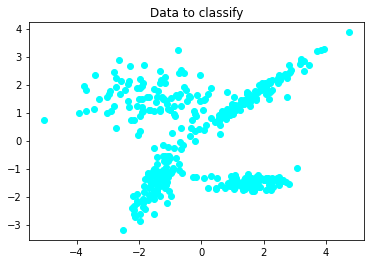

In [3]:
#This code cannot be modified!!
data, clase = make_classification(n_samples=400,n_features=2, n_redundant=0, n_informative=2, 
                              n_classes=4, n_clusters_per_class=1,  class_sep=1.5,
                              random_state=1)


plt.scatter(data[:,0], data[:,1], c="cyan")
plt.title("Data to classify");

**Centroid generation**

The variable centroids is an array with 4 2D points.

We will show the centroids in black 

In [4]:
# Algorithm constants
k = 4
max_iterations = 2000
np.random.seed(28) # Don't change this value

# Centroid random generation 
maxim = np.max(data[:])
centroids = (np.random.rand(2, k)*maxim*2)- maxim

#print(centroids.shape) # Uncomment to see the centroids structure

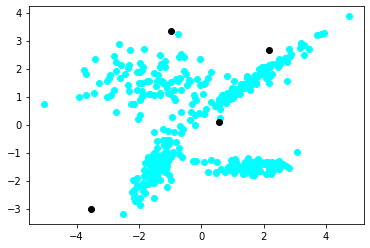

In [5]:
 # Visualization
centroides_iniciales = np.copy(centroids)
plt.scatter(data[:,0], data[:,1], c="cyan")
plt.scatter(centroides_iniciales[0,:], centroides_iniciales[1,:], c="black");

## Algorithm


In [6]:
def minimum_distance(centroids, punto):

  distances = np.zeros((centroids.shape[1]))

  for i in range(centroids.shape[1]):
    distances[i] = math.sqrt((centroids[0,i]-punto[0])**2 + (centroids[1,i]-punto[1])**2)

  return np.argmin(distances)


## Algorithm
idx = 0
is_moving = True
max_iterations= 20
while idx < max_iterations and is_moving:

  points = np.zeros((2,k))
  n_ocurrences = np.zeros(k)

  for i in range(0,data.shape[0]):

    d = minimum_distance(centroids, data[i,:])
    n_ocurrences[d] += 1
    points[:,d] += data[i,:]

  # Update centroids
  new_centroids = points / n_ocurrences
  is_moving = False

  for s in range(k):

    dist = math.sqrt((new_centroids[0,s]-centroids[0,s])**2 + (new_centroids[1,s]-centroids[1,s])**2)

    if dist > 0.01:
      is_moving = True
  
  centroids = np.copy(new_centroids)
  idx += 1


print("Number of iterations: ", idx)
  

Number of iterations:  6


## Show results

In [9]:
# Assign the closest centroid to y 
y = np.zeros(data.shape[0])   # Here
for i in range(0,data.shape[0]):

  y[i] = minimum_distance(centroids, data[i,:])


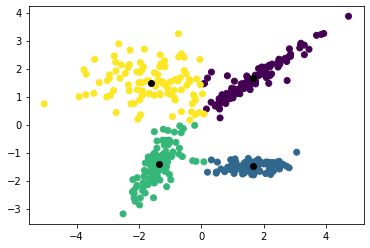

In [10]:

plt.scatter(data[:,0], data[:,1], c=y) 
plt.scatter(centroids[0,:], centroids[1,:], c="black");